In [137]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [138]:
df1= pd.read_csv("/home/jeffy/Downloads/ML/CICIoT2023/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df1.head(20)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood
5,0.000000,0.00,47.00,64.00,1.954123,1.954123,0.0,0.0,0.0,0.0,...,0.000000,592.00,8.369840e+07,9.5,34.409301,0.000000,0.000000,0.00,141.55,Mirai-greeth_flood
6,1.052463,108.00,6.00,64.00,1.902353,1.902353,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336548e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
7,0.142555,2322.79,6.66,79.77,493.283636,493.283636,0.0,0.0,0.0,0.0,...,35.347029,94.41,8.370717e+07,9.5,13.422817,48.122903,3201.472632,0.38,141.55,Mirai-udpplain
8,0.002135,192.52,16.89,65.73,16.883240,16.883240,0.0,0.0,0.0,0.0,...,7.624944,180.72,8.300732e+07,9.5,18.809396,10.792987,328.325187,0.19,141.55,DoS-UDP_Flood
9,0.000000,54.20,6.00,64.00,11.243547,11.243547,0.0,0.0,1.0,0.0,...,0.619849,54.20,8.308906e+07,9.5,10.409168,0.878113,3.254011,0.12,141.55,DDoS-SYN_Flood


In [139]:
#df_tr = df.loc[df["label"] == 'DDoS-ICMP_Flood', df["label"] == 'DDoS-UDP_Flood', df["label"] == 'DDoS-TCP_Flood' ]
array = ['DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood' ]
df=df1.loc[df1["label"].isin(array)]
df.shape

(87329, 47)

In [140]:
df["label"].value_counts()

DDoS-ICMP_Flood    36554
DDoS-UDP_Flood     27626
DDoS-TCP_Flood     23149
Name: label, dtype: int64

In [149]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])
train_df.shape

(69863, 47)

In [150]:
features = list(train_df.columns)
features.remove("label")

In [151]:
label_encoder = LabelEncoder()
train_df["label"] = label_encoder.fit_transform(train_df["label"])
test_df["label"] = label_encoder.transform(test_df["label"])

In [152]:
scaler = StandardScaler()

train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])


In [153]:
X_train = train_df[features].values
y_train = train_df["label"].values

X_test= test_df[features].values
y_test=test_df['label'].values

In [156]:
y_train

array([0, 1, 1, ..., 1, 0, 0])

In [160]:
tree=DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

tree_score = tree.score(X_test,y_test)
y_predict = tree.predict(X_test)

print('Accuracy of Tree:' + (str(tree_score)))
precision, recall, fscore, none = precision_recall_fscore_support(y_test, y_predict, average = 'weighted')

print('Precision of Tree:' + (str(precision)))
print('Recall of Tree:' + (str(recall)))
print('F1 Score of Tree:' + (str(fscore)))
print(classification_report(y_test, y_predict))


Accuracy of Tree:1.0
Precision of Tree:1.0
Recall of Tree:1.0
F1 Score of Tree:1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7311
           1       1.00      1.00      1.00      4630
           2       1.00      1.00      1.00      5525

    accuracy                           1.00     17466
   macro avg       1.00      1.00      1.00     17466
weighted avg       1.00      1.00      1.00     17466



In [158]:
y_predict

array([0, 1, 2, ..., 2, 2, 2])

In [159]:
y_test

array([0, 1, 2, ..., 2, 2, 2])

Text(24.0, 0.5, 'y_true')

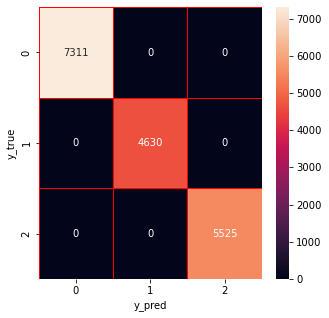

In [164]:
cm=confusion_matrix(y_test, y_predict)
f,ax= plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor='red', fmt = '.0f',ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")

In [82]:
#scaler = StandardScaler()
#
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)
#
#X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
#X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)